In [44]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
n_samples, n_features = 100, 1
# rng = np.random.RandomState(0)

In [35]:
y = [i*5 for i in range(n_samples)]
x = np.array([i for i in range(n_samples)]).reshape(-1, 1)

In [73]:
clf = linear_model.SGDRegressor(max_iter=999999999, tol=1e-3, early_stopping=True)
clf.fit(x, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss',
             max_iter=999999999, n_iter_no_change=5, penalty='l2', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [74]:
x_to_predict = [[5], [6], [8], [10]]
y_test = [[5*5], [6*5], [8*5], [10*5]]
y_test

[[25], [30], [40], [50]]

In [75]:
y_pred = clf.predict(x_to_predict)

In [76]:
def plot(regr, y_test, y_pred, X_test):
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
          % r2_score(y_test, y_pred))

    # Plot outputs
    plt.scatter(X_test, y_test,  color='black')
    plt.plot(X_test, y_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

Coefficients: 
 [9.27934891e+10]
Mean squared error: 534937652038802071355392.00
Coefficient of determination: -5802713513641242525696.00


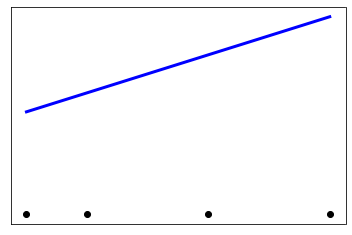

In [77]:
plot(clf, y_test, y_pred, x_to_predict)

In [50]:
y_test

[[25], [30], [40], [5000]]

In [51]:
regr = linear_model.LinearRegression()

In [52]:
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
y_pred = regr.predict(x_to_predict)

Coefficients: 
 [5.]
Mean squared error: 0.00
Coefficient of determination: 1.00


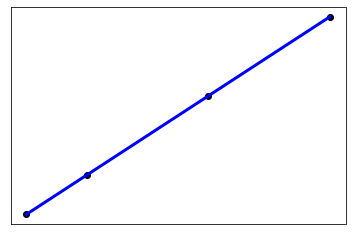

In [57]:
plot(regr, y_test, y_pred, x_to_predict)

# What happens if we scale the data?

According to 

https://scikit-learn.org/stable/modules/sgd.html#sgd

, SGD is very sensitive to feature scaling. Perhaps we should scale?

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)  # Don't cheat - fit only on training data
X_train = scaler.transform(x)
X_test = scaler.transform(x_to_predict)  # apply same transformation to test data

In [81]:
clf = linear_model.SGDRegressor(max_iter=10**6, tol=1e-3, early_stopping=True)
clf.fit(X_train, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [82]:
y_pred = clf.predict(X_test)

Coefficients: 
 [144.25895721]
Mean squared error: 0.00
Coefficient of determination: 1.00


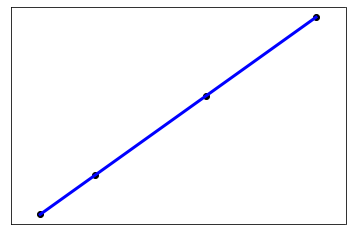

In [83]:
plot(clf, y_test, y_pred, X_test)

In [84]:
y_pred

array([24.96415745, 29.9616842 , 39.9567377 , 49.9517912 ])